In [59]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [60]:
df=pd.read_csv(r'./rq_1_2.csv')

In [61]:
len(df)

641628

In [62]:
df.columns

Index(['product', 'issue_id', 'part_of_day_commit', 'committer', 'hash',
       'commit_time', 'message_sentiment', 'issuetype', 'priority',
       'category'],
      dtype='object')

In [63]:
def mww_test_between_sentiment(data, category_column):
    unique_categories = data[category_column].unique()
    
    results = []
    
    for category in unique_categories:
        positive_data = data[data[category_column] == category]['sentiment_score_positive']
        negative_data = data[data[category_column] == category]['sentiment_score_negative']
        
        u_statistic, p_value = stats.mannwhitneyu(positive_data, negative_data)
        
        results.append({
            f'{category_column}': category,
            'u_statistic': u_statistic,
            'p_value': p_value
        })
        
    return pd.DataFrame(results)

def mww_test_between_categories(data, category_column):
    unique_categories = data[category_column].unique()
    
    results = []
    
    for category1, category2 in combinations(unique_categories, 2):
        category1_data = data[data[category_column] == category1]['sentiment_score_cumulative']
        category2_data = data[data[category_column] == category2]['sentiment_score_cumulative']
        
        u_statistic, p_value = stats.mannwhitneyu(category1_data, category2_data)
        
        results.append({
            f'{category_column}1': category1,
            f'{category_column}2': category2,
            'u_statistic': u_statistic,
            'p_value': p_value
        })
        
    return pd.DataFrame(results)

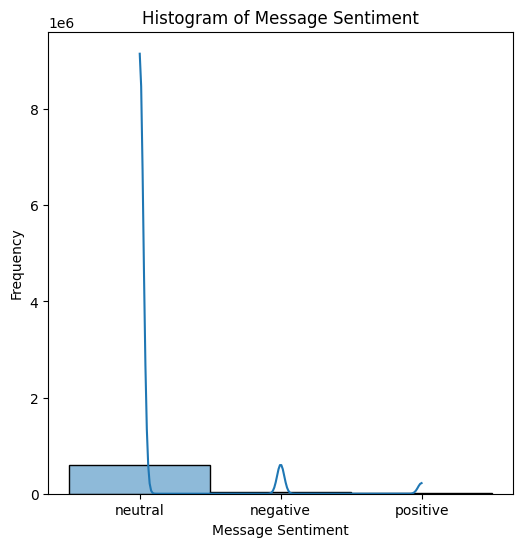

In [64]:
plt.figure(figsize=(6, 6))
sns.histplot(df['message_sentiment'], kde=True)
plt.title('Histogram of Message Sentiment')
plt.xlabel('Message Sentiment')
plt.ylabel('Frequency')
plt.show()



In [65]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_score'] = df['message_sentiment'].map(sentiment_mapping)
 
df['is_negative'] = df['message_sentiment'] == 'negative'
df['is_positive'] = df['message_sentiment'] == 'positive'
df['is_neutral'] = df['message_sentiment'] == 'neutral'

# df['is_bug'] = df['issuetype'] == 'bug'
# df['is_nonbug'] = df['issuetype'] != 'bug'
# 
# df['is_blocker'] = df['priority'] == 'Blocker'
# df['is_critical'] = df['priority'] == 'Critical'
# df['is_major'] = df['priority'] == 'Major'
# df['is_minor'] = df['priority'] == 'Minor'
# df['is_trivial'] = df['priority'] == 'Trivial'

cumulative_scores = df.groupby('issue_id')['sentiment_score'].sum().reset_index()
positive_scores = df.groupby('issue_id')['is_positive'].sum().reset_index()
negative_scores = df.groupby('issue_id')['is_negative'].sum().reset_index()

df = df.merge(cumulative_scores, on='issue_id', suffixes=('', '_cumulative'))
df = df.merge(positive_scores, on='issue_id', suffixes=('', '_count'))
df = df.rename(columns={'is_positive_count': 'sentiment_score_positive'})
df = df.merge(negative_scores, on='issue_id', suffixes=('', '_count'))
df = df.rename(columns={'is_negative_count': 'sentiment_score_negative'})

assert len(df[df['sentiment_score_cumulative'] != df['sentiment_score_positive'] - df['sentiment_score_negative']]) == 0
print(len(df))
df.sample(10)

641628


,product,issue_id,part_of_day_commit,committer,hash,commit_time,message_sentiment,issuetype,priority,category,sentiment_score,is_negative,is_positive,is_neutral,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
114351,CAMEL,12486684,Afternoon,3fd0118c3951fe6f6b7fd169e7e01f9086ac6a81,ab536c379d13beff2591cb3be0cde831432b27f8,2009-07-12 14:56:40+00:00,neutral,non-bug,Major,high,0,False,False,True,1,1,0
23696,HBASE,13101986,Evening,ae2666ce7ba2ace7f175aaf8ee1440be3f1a21e0,40a73c9be512ed6cc750937f20edab9c91efe740,2017-09-24 01:28:58+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
638081,ODE,13109894,Afternoon,78515e13ccd07a4c695e8009b32fbfeccd650b2c,94d6cb2f3262c3178c3db3d0414d59271e7df396,2017-11-28 11:32:52+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
491063,SYNCOPE,13087213,Afternoon,31f23873a35f36c425c67ce19e52409ea9d1eb81,e21971bf5abb8c9724c464b4ae402ffa2ceb1981,2017-07-18 10:20:37+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
304904,PHOENIX,13045843,Afternoon,0823140c263078c8846bb36c62cbb317f745ed11,a8b2b3d364030f4e92ae0c49379334c09f8454d0,2017-02-24 00:33:36+00:00,negative,non-bug,Major,high,-1,True,False,False,-1,0,1
472472,CAY,12418931,Afternoon,c055919a68d8510bb4b860121a65f705fab953b5,838efc8c9939cb5110d77817f59a5ff3e1f59d6a,2008-11-06 15:07:27+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
330775,IGNITE,12947115,Afternoon,6ccc2ba57a3db39542cda43159ef196c3794f4ca,0991437a3f4d38e68483a8bcadd3daf614b7b2dc,2018-04-13 21:48:10+00:00,neutral,Bug,Major,high,0,False,False,True,2,2,0
196333,HIVE,13129676,Evening,2fb5d269281da51ef77ea8492d26b793b91e24b2,7e64114ddca5c07a0c4ac332c1b34b534cc2e9ed,2018-01-13 02:13:35+00:00,neutral,Bug,Major,high,0,False,False,True,0,0,0
171897,SOLR,12691300,Afternoon,b6f5cb184c54ccf7ac570c25e1872c1c252c325e,a193836b8628f0273f96aae969e96e59e5d66cd7,2014-01-27 17:03:09+00:00,neutral,Bug,Major,high,0,False,False,True,0,0,0
416957,IMPALA,13051077,Morning,96b49326573bf5783fae5fe74e8087ca701eaf24,8eea7a6953c29623873fa21eae8edf89f0d7dd22,2014-01-08 18:52:40+00:00,neutral,non-bug,Major,low,0,False,False,True,0,0,0


In [66]:
df.columns

Index(['product', 'issue_id', 'part_of_day_commit', 'committer', 'hash',
       'commit_time', 'message_sentiment', 'issuetype', 'priority', 'category',
       'sentiment_score', 'is_negative', 'is_positive', 'is_neutral',
       'sentiment_score_cumulative', 'sentiment_score_positive',
       'sentiment_score_negative'],
      dtype='object')

In [67]:
# make a table for only the individual issues

df_issues = df.drop_duplicates(subset='issue_id')
df_issues = df_issues[['issue_id', 'product', 'issuetype','part_of_day_commit', 'priority', 'sentiment_score_cumulative', 'sentiment_score_positive', 'sentiment_score_negative']]

print(len(df_issues))
df_issues.sample(10)

297648


,issue_id,product,issuetype,part_of_day_commit,priority,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
395134,12680314,ACCUMULO,non-bug,Afternoon,Major,2,2,0
250108,12845632,HADOOP,non-bug,Evening,Major,0,0,0
400305,13378,JAMES,Bug,Night,Major,0,0,0
144937,13242214,SPARK,non-bug,Afternoon,Major,0,0,0
374298,13084877,GEODE,Bug,Afternoon,Major,0,0,0
165741,12373926,SOLR,non-bug,Night,Trivial,0,0,0
242871,12397307,HADOOP,Bug,Afternoon,Blocker,0,0,0
250017,12858668,HADOOP,non-bug,Afternoon,Trivial,0,0,0
224749,12715117,LUCENE,non-bug,Morning,Major,0,0,0
332882,13158535,IGNITE,Bug,Afternoon,Major,0,0,0


In [68]:
df_issues.describe()

,issue_id,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
count,2.976480e+05,297648.000000,297648.000000,297648.000000
mean,1.286328e+07,-0.083444,0.047707,0.131152
std,3.828417e+05,0.693179,0.315237,0.626490
min,1.334000e+04,-96.000000,0.000000,0.000000
25%,1.266636e+07,0.000000,0.000000,0.000000
50%,1.290651e+07,0.000000,0.000000,0.000000
75%,1.309605e+07,0.000000,0.000000,0.000000
max,1.328001e+07,36.000000,41.000000,108.000000


In [69]:
rq2_contingency_table = pd.crosstab(df['part_of_day_commit'], df['message_sentiment'])
rq2_contingency_table

message_sentiment,negative,neutral,positive
part_of_day_commit,,,
Afternoon,17623,243483,5704
Evening,8432,133617,2963
Morning,10037,147416,3946
Night,2945,63875,1587


In [70]:
chi2, p, dof, expected = stats.chi2_contingency(rq2_contingency_table)

print(f"\nChi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Statistic: 597.4521877544641
p-value: 8.266654272472116e-126
Degrees of Freedom: 6
Expected Frequencies:
[[ 16232.86697276 244672.30655458   5904.82647266]
 [  8822.60974272 132980.10013902   3209.29011826]
 [  9819.60382496 148007.44202092   3571.95415412]
 [  4161.91945956  62731.15128548   1513.92925496]]


In [71]:
observed = rq2_contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals, index=rq2_contingency_table.index, columns=rq2_contingency_table.columns)

print("\nStandardized Residuals:")
print(residuals_df)


Standardized Residuals:
message_sentiment    negative   neutral  positive
part_of_day_commit                               
Afternoon           10.910854 -2.404371 -2.613469
Evening             -4.158575  1.746537 -4.347529
Morning              2.193840 -1.537342  6.258524
Night              -18.863184  4.566957  1.877979


In [72]:
df_issues.columns

Index(['issue_id', 'product', 'issuetype', 'part_of_day_commit', 'priority',
       'sentiment_score_cumulative', 'sentiment_score_positive',
       'sentiment_score_negative'],
      dtype='object')

In [73]:
mww_test_between_categories(df_issues, 'part_of_day_commit')

,part_of_day_commit1,part_of_day_commit2,u_statistic,p_value
0,Afternoon,Morning,4.499225e+09,4.981662e-16
1,Afternoon,Night,1.941893e+09,2.394017e-65
2,Afternoon,Evening,4.110586e+09,2.135961e-15
3,Morning,Night,1.197960e+09,2.586604e-25
4,Morning,Evening,2.535018e+09,9.247361e-01
5,Night,Evening,1.141324e+09,7.192601e-27


In [74]:
mww_test_between_sentiment(df_issues, 'part_of_day_commit')

,part_of_day_commit,u_statistic,p_value
0,Afternoon,7.090839e+09,0.000000e+00
1,Morning,2.666803e+09,4.591038e-232
2,Night,5.301261e+08,5.657048e-28
3,Evening,2.224785e+09,4.835841e-235


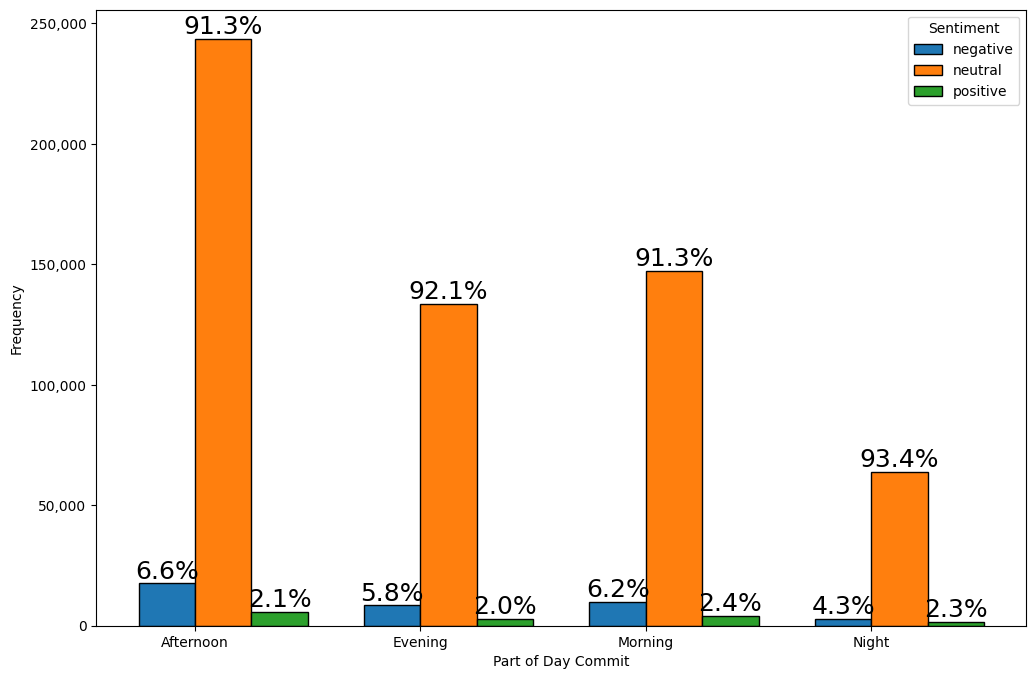

In [75]:
grouped = df.groupby(['part_of_day_commit', 'message_sentiment']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))  

sentiments = grouped.columns
issue_types = grouped.index

bar_width = 0.25
bar_positions = list(range(len(issue_types)))

for i, sentiment in enumerate(sentiments):
    offset = i * bar_width - bar_width / 2

    bars = plt.bar([pos + offset for pos in bar_positions], grouped[sentiment], width=bar_width, label=sentiment, edgecolor='k')
    
    for bar, pct in zip(bars, grouped_percent[sentiment]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=18)


# Customize plot
plt.xlabel('Part of Day Commit')
plt.ylabel('Frequency')
# plt.title('Sentiment Frequencies by Issue Type')
plt.xticks(bar_positions, issue_types)
plt.legend(title='Sentiment', loc='upper right')
plt.gca().get_xaxis().tick_bottom() 
plt.gca().get_yaxis().tick_left()  
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(False)
plt.show()

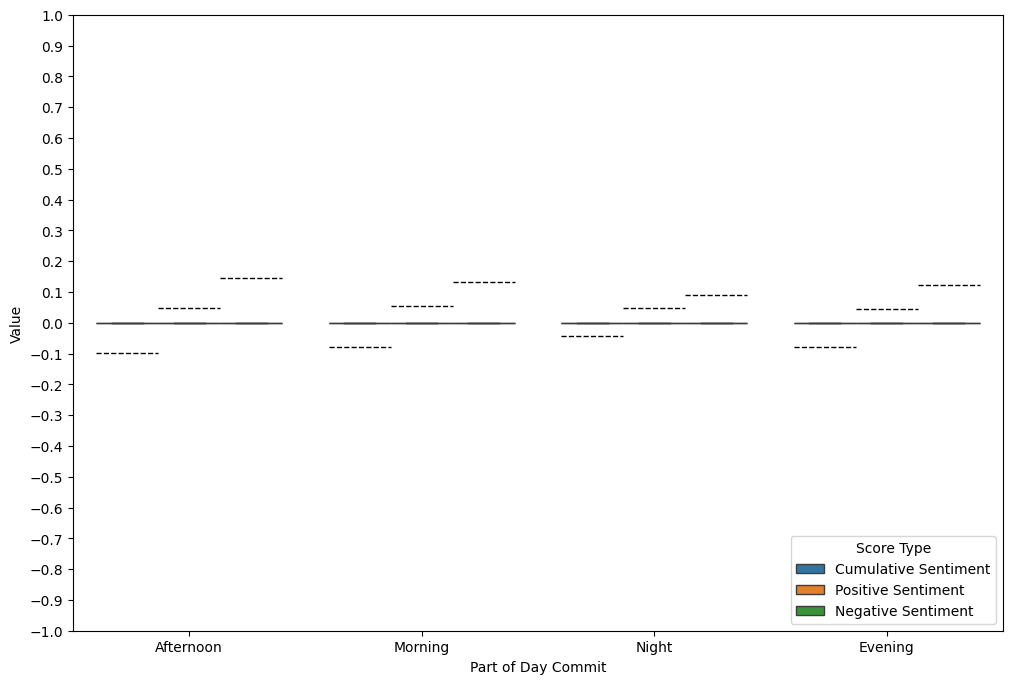

In [76]:
df = df_issues

melted = pd.melt(
    df,
    id_vars=['part_of_day_commit'],
    value_vars=['sentiment_score_cumulative', 'sentiment_score_positive', 'sentiment_score_negative'],
    var_name='score_type',
    value_name='score'
)

# rename score types
melted['score_type'] = melted['score_type'].map({
    'sentiment_score_cumulative': 'Cumulative Sentiment',
    'sentiment_score_positive': 'Positive Sentiment',
    'sentiment_score_negative': 'Negative Sentiment'
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='part_of_day_commit', y='score', hue='score_type', data=melted, showmeans=True, meanline=True, fliersize=0,
            meanprops={'linestyle': '--', 'linewidth': 1, 'color': 'k'})
# plt.title('Distribution of mean positive, negative, and cumulative sentiment scores for issue types.')
plt.xlabel('Part of Day Commit')
plt.ylabel('Value')
plt.ylim(-0.5, 0.5)
plt.yticks(np.arange(-1, 1.1, 0.1))
plt.legend(title='Score Type', loc='lower right')
plt.show()